In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

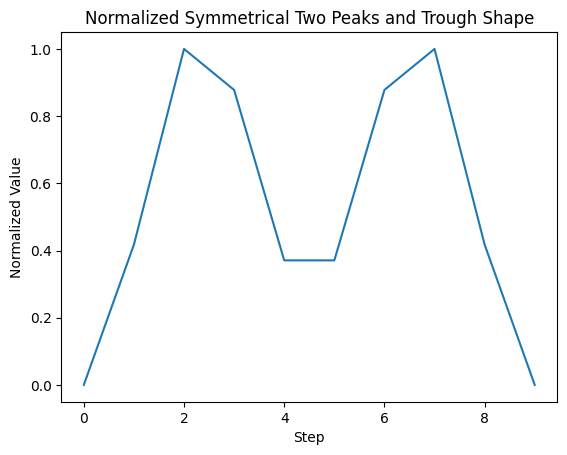

In [8]:
def generate_smooth_symmetric_two_peaks_trough_normalized(n):
    # Define new key positions and values for a symmetrical shape
    # Key positions are symmetric and the trough is now at the center
    key_positions = [0, 2.5, 5, 7.5, 10]  # Symmetrical positions with the trough in the center (at 5)
    key_values = [0, 1, 0.25, 1, 0]  # Corresponding values for start, peaks, trough, and end
    
    # Use cubic spline for smooth interpolation with custom boundary conditions
    # Flat slope at start and end (ease-in and ease-out)
    spline_interpolator = CubicSpline(key_positions, key_values, bc_type=((1, 0), (1, 0)))

    # Generate evenly spaced positions for n steps
    new_positions = np.linspace(0, 10, n)

    # Generate interpolated values with the cubic spline
    smooth_values = spline_interpolator(new_positions)

    # Normalize the result to range 0-1
    normalized_values = (smooth_values - smooth_values.min()) / (smooth_values.max() - smooth_values.min())

    # Create a DataFrame
    df = pd.DataFrame(normalized_values, columns=['Normalized Symmetrical Two Peaks and Trough'])

    return df

# Generate for n steps
n = 10
df = generate_smooth_symmetric_two_peaks_trough_normalized(n)

# Optionally, plot the smooth normalized shape
plt.plot(df['Normalized Symmetrical Two Peaks and Trough'])
plt.title('Normalized Symmetrical Two Peaks and Trough Shape')
plt.xlabel('Step')
plt.ylabel('Normalized Value')
plt.show()
